In [122]:
# Import necessary modules,
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import validation_curve

In [123]:
# Loading data
monk1_train = pd.read_csv('data/monks-1.train',header=None,sep=" ")
monk1_test = pd.read_csv('data/monks-1.test',header=None,sep=" ")
monk2_train = pd.read_csv('data/monks-2.train',header=None,sep=" ")
monk2_test = pd.read_csv('data/monks-2.test',header=None,sep=" ")
monk3_train = pd.read_csv('data/monks-3.train',header=None,sep=" ")
monk3_test = pd.read_csv('data/monks-3.test',header=None,sep=" ")
ml_cup22_train = pd.read_csv('data/ML-CUP22-TR.csv', header=None)
ml_cup22_test = pd.read_csv('data/ML-CUP22-TS.csv', header=None)

In [124]:
train1 = monk1_train.drop(columns=0)
columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6', 'id']
train1.columns = columns
test1 = monk1_test.drop(columns=0)
columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6', 'id']
test1.columns = columns
train2 = monk2_train.drop(columns=0)
columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6', 'id']
train2.columns = columns
test2 = monk2_test.drop(columns=0)
columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6', 'id']
test2.columns = columns
train3 = monk3_train.drop(columns=0)
columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6', 'id']
train3.columns = columns
test3 = monk3_test.drop(columns=0)
columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6', 'id']
test3.columns = columns

In [125]:
# Splitting the train set in X and y
X_train1 = train1.copy()
y_train1 = X_train1['class']
X_train1 = X_train1.drop(columns='id')
X_train1 = X_train1.drop(columns='class')
X_train1 = X_train1.values
# Splitting the test set in X and y
X_test1 = test1.copy()
y_test1 = X_test1['class']
X_test1 = X_test1.drop(columns='id')
X_test1 = X_test1.drop(columns='class')
X_test1 = X_test1.values

In [126]:
# Splitting the train set in X and y
X_train2 = train2.copy()
y_train2 = X_train2['class']
X_train2 = X_train2.drop(columns='id')
X_train2 = X_train2.drop(columns='class')
X_train2 = X_train2.values
# Splitting the test set in X and y
X_test2 = test2.copy()
y_test2 = X_test2['class']
X_test2 = X_test2.drop(columns='id')
X_test2 = X_test2.drop(columns='class')
X_test2 = X_test2.values

In [127]:
# Splitting the train set in X and y
X_train3 = train3.copy()
y_train3 = X_train3['class']
X_train3 = X_train3.drop(columns='id')
X_train3 = X_train3.drop(columns='class')
X_train3 = X_train3.values
# Splitting the test set in X and y
X_test3 = test3.copy()
y_test3 = X_test3['class']
X_test3 = X_test3.drop(columns='id')
X_test3 = X_test3.drop(columns='class')
X_test3 = X_test3.values

In [128]:
pipeline = make_pipeline(KNeighborsClassifier())
param_grid = [{
    'kneighborsclassifier__n_neighbors': [18], # lower VL error increase
    'kneighborsclassifier__p': [1],
    'kneighborsclassifier__weights': ['distance'],
    'kneighborsclassifier__algorithm': ['auto'],
    'kneighborsclassifier__metric': ['euclidean','manhattan','cityblock'],
    }]

# Parameters config

In [129]:
# Create a grid search instance
gs = GridSearchCV(pipeline, param_grid = param_grid,
    scoring='accuracy',
    refit=True,
    cv=60,
    verbose=4,
    n_jobs=1,
    return_train_score=True)


In [130]:
# Run fit over all the models (combinations of hyperparameters)
h = gs.fit(X_train3, y_train3)

Fitting 60 folds for each of 6 candidates, totalling 360 fits
[CV 1/60] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=euclidean, kneighborsclassifier__n_neighbors=5, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 2/60] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=euclidean, kneighborsclassifier__n_neighbors=5, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/60] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=euclidean, kneighborsclassifier__n_neighbors=5, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/60] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=euclidean, kneighborsclassifier__n_neighbors=5, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance

[CV 25/60] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=manhattan, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 26/60] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=manhattan, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 27/60] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=manhattan, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 28/60] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=manhattan, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=(train=1.000, test=0.500) total time=   0.0s


In [131]:
print('Best Score: %.3f' % gs.best_score_, 'Best Parameters: ', gs.best_params_)

Best Score: 0.886 Best Parameters:  {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 18, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}


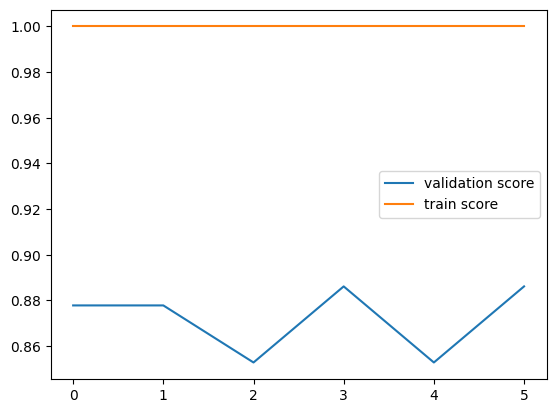

In [132]:
validation_scores = h.cv_results_['mean_test_score']
train_scores = h.cv_results_['mean_train_score'] 
plt.plot(validation_scores, label='validation score')
plt.plot(train_scores, label='train score')
plt.legend(loc='best')
plt.show()

In [133]:
y_pred3 = gs.predict(X_test3)
import warnings
warnings.filterwarnings('ignore')  

print("Accuracy score:", accuracy_score(y_test3, y_pred3))

Accuracy score: 0.9120370370370371


In [134]:
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       204
           1       0.94      0.89      0.91       228

    accuracy                           0.91       432
   macro avg       0.91      0.91      0.91       432
weighted avg       0.91      0.91      0.91       432

[[192  12]
 [ 26 202]]
